## Diego Orejuela

## Q1) Load the dataset into a pandas dataframe and display the first 5 lines of the dataset along with the column headings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
dataset = pd.read_csv('data.csv')
dataset.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Q2) Display the number of instances for each class. That is, you should write code to find out how many instances you have for class 1, class 2, class 3, and class 4.

In [3]:
#Split Dataset into train and test features
X = dataset.iloc[: , :-1].values
y = dataset.iloc[ : , 11 ].values

totInst = 0
for i in range(1,5):
    numInst = (y == i).sum()
    print('There are: ', numInst, 'instances for class', i)
    totInst += numInst
print('Total number of instances: ', totInst)

There are:  266 instances for class 1
There are:  217 instances for class 2
There are:  281 instances for class 3
There are:  236 instances for class 4
Total number of instances:  1000


## Q3) Create histograms of columns age and income to visually explore their distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112b815c0>]],
      dtype=object)

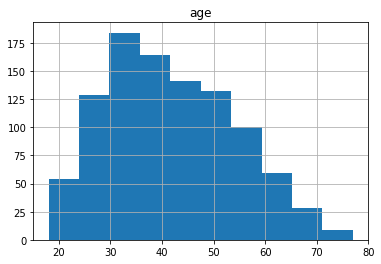

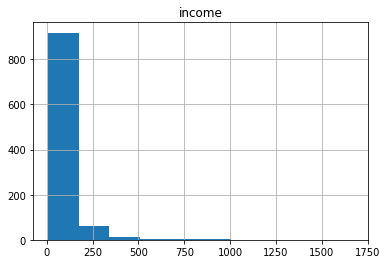

In [4]:
# Pandas Histogram
dataset.hist(column='age')
dataset.hist(column='income')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


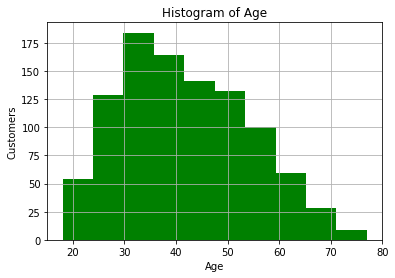

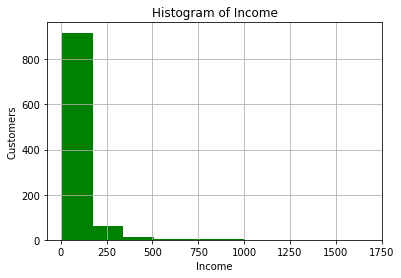

In [5]:
# Matplotlib Histogram
plt.hist(X[:,2],normed=False, facecolor='g')
plt.xlabel('Age')
plt.ylabel('Customers')
plt.title('Histogram of Age')
plt.grid()
plt.show()

plt.hist(X[:,5],normed=False, facecolor='g')
plt.grid()
plt.xlabel('Income')
plt.ylabel('Customers')
plt.title('Histogram of Income')
plt.show()


## Q5) Split the dataset into training (80%) and testing set (20%).

In [6]:
# Dealing with categorical Nominal variables first
# from the scikit.preprocessing library we first import the Label Encoder class
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder()
# X[: , 0] = labelEncoder_X.fit_transform(X[ : , 0])
# OneHotEncoder class avoids categorical variables from being evaluated by their int value
oneHotEncoder = OneHotEncoder(categorical_features = [0,3,8,9])
# toarray() method is used to return an ndarray 
X = oneHotEncoder.fit_transform(X).toarray()
# remove the extra dummy variable
X = X[: , 1:]

# Split data into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Q4) Perform normalization of the data using standardization.

In [7]:
# Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Q6) Model 1: Fit a logistic regression model. What is the testing misclassification rate you get?

In [17]:
# Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj_lr = LogisticRegression(random_state=0)
classifierObj_lr.fit(X_train, y_train)

#Making Predictions on the Test Set
y_pred = classifierObj_lr.predict(X_test)

#Evaluate predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr= confusion_matrix(y_test, y_pred)
print('Confussion Matrix: \n',cm_lr)
#model accuracy
lr_ModAcc = ((cm_lr.diagonal().sum()/cm_lr.sum()))
print('Model Accuracy: ', lr_ModAcc)
#misclassification rate
lr_MiscRate = 1- lr_ModAcc
print("Misclassification Rate: ", lr_MiscRate)

Confussion Matrix: 
 [[27  6 21  7]
 [ 6 12 13 13]
 [12  7 27  4]
 [ 6 14  9 16]]
Model Accuracy:  0.41
Misclassification Rate:  0.5900000000000001


## Q7) Model 2: We will now fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, run k-NN with different values of k and compute the testing misclassification rate. Plot a chart with k on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of k?

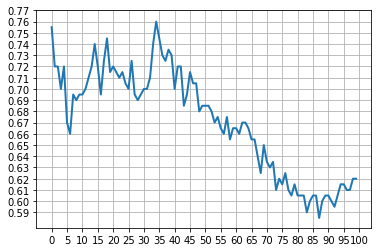

Lowest Testing error value:  [0.585]
Corresponding value of k:  88


In [18]:
from sklearn.neighbors import KNeighborsClassifier

missClass = []
for i in range(1,101):
    
    # Make Classifier object called classifierObj
    classifierObj_kNN = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    # try with different number of neighbors
    classifierObj_kNN.fit(X_train, y_train)

    #Making Predictions on the Test Set
    y_pred = classifierObj_kNN.predict(X_test)

    #Evaluate predictions using a Confusion Matrix
    cm_kNN = confusion_matrix(y_test, y_pred)
#     print(i, 'neighbors \n',cm_kNN)

    #model accuracy
    kNN_accuracy = (cm_kNN.diagonal().sum()/cm_kNN.sum())
#     print('Model Accuracy: ',kNN_accuracy)

    #misclassification rate
    kNN_missClassif = 1- kNN_accuracy
#     print('Misclassification Rate: ',kNN_missClassif)
    
    missClass.append([kNN_missClassif])
    
plt.plot(missClass, linewidth=2)
plt.grid()
plt.xticks(np.arange(0, 101, step=5))
plt.yticks(np.arange(0.59, 0.775, step=0.01))
plt.show()

kNN_minTEval = min(missClass)
kNN_val = missClass.index(min(missClass)) + 1
print('Lowest Testing error value: ', kNN_minTEval)
print('Corresponding value of k: ', kNN_val)

# Make Classifier object called classifierObj
classifierObj_kNN_ensemble = KNeighborsClassifier(n_neighbors=kNN_val, p=2, metric='minkowski')

## Q8) Model 3: Fit SVM model with different kernels. Which kernel gives the least testing error?

Default Kernel 
 [[24  5 25  7]
 [ 4 11 18 11]
 [14  9 17 10]
 [ 8 13 11 13]]
Model Accuracy:  0.325
Misclassification Rate:  0.675 

Sigmoid Kernel: 
 [[32  4 21  4]
 [ 6 10 13 15]
 [16  8 20  6]
 [ 6 13  9 17]]
Model Accuracy:  0.395
Misclassification Rate:  0.605 

Linear Kernel: 
 [[30  5 19  7]
 [ 7  9 13 15]
 [14  9 24  3]
 [ 7 15  7 16]]
Model Accuracy:  0.395
Misclassification Rate:  0.605 

polynomial of degree:  0
[[ 0  0 61  0]
 [ 0  0 44  0]
 [ 0  0 50  0]
 [ 0  0 45  0]]
Model Accuracy:  0.25
Misclassification Rate:  0.75 

polynomial of degree:  1
[[30  5 20  6]
 [ 7  9 14 14]
 [12  6 28  4]
 [ 7 15  7 16]]
Model Accuracy:  0.415
Misclassification Rate:  0.585 

polynomial of degree:  2
[[25  7 29  0]
 [21  4 19  0]
 [19  6 21  4]
 [16  8 17  4]]
Model Accuracy:  0.27
Misclassification Rate:  0.73 

polynomial of degree:  3
[[27  5 23  6]
 [ 6 13 12 13]
 [12  9 21  8]
 [ 8 12 11 14]]
Model Accuracy:  0.375
Misclassification Rate:  0.625 

polynomial of degree:  4
[[19  3 

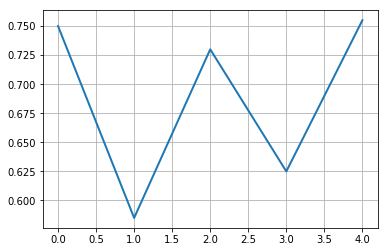

Lowest Testing error value:  [0.585]
Corresponding value of k:  1
Polynomial Kernel of degree 1 gives the least testing error


In [19]:
from sklearn.svm import SVC

# Default kernel uses RBF or Gaussian
classifierObj_svm = SVC() 
classifierObj_svm.fit(X_train, y_train)
#Making Predictions on the Test Set
y_pred = classifierObj_svm.predict(X_test)

#Evaluate predictions using a Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred)
print("Default Kernel \n",cm_svm)

#model accuracy
svm_accuracy = (cm_svm.diagonal().sum()/cm_svm.sum())
print("Model Accuracy: ",svm_accuracy)

#misclassification rate
svm_missClassif = 1- svm_accuracy
print("Misclassification Rate: ",svm_missClassif,"\n")


# Make Classifier object called classifierObj for Sigmoid Kernel
from sklearn.svm import SVC
# try the sigmoid kernel
classifierObj_svm_sig = SVC(kernel='sigmoid')
classifierObj_svm_sig.fit(X_train, y_train)

#Making Predictions on the Test Set
y_pred = classifierObj_svm_sig.predict(X_test)

#Evaluate predictions using a Confusion Matrix
cm_svm_sig = confusion_matrix(y_test, y_pred)
print("Sigmoid Kernel: \n",cm_svm_sig)

#model accuracy
svm_sig_accuracy = (cm_svm_sig.diagonal().sum()/cm_svm_sig.sum())
print("Model Accuracy: ",svm_sig_accuracy)

#misclassification rate
svm_sig_missClassif = 1- svm_sig_accuracy
print("Misclassification Rate: ", svm_sig_missClassif,"\n")


# Make Classifier object called classifierObj for Linear Kernel
classifierObj_svm_ln = SVC(kernel = 'linear') 
classifierObj_svm_ln.fit(X_train, y_train)
#Making Predictions on the Test Set
y_pred = classifierObj_svm_ln.predict(X_test)

#Evaluate predictions using a Confusion Matrix
cm_svm_ln = confusion_matrix(y_test, y_pred)
print('Linear Kernel: \n',cm_svm_ln)

#model accuracy
ln_svm_accuracy = (cm_svm_ln.diagonal().sum()/cm_svm_ln.sum())
print("Model Accuracy: ",ln_svm_accuracy)

#misclassification rate
ln_svm_missClassif = 1- ln_svm_accuracy
print("Misclassification Rate: ",ln_svm_missClassif,"\n")

missClass_degrees = []
# Make Classifier object called classifierObj for polynomial Kernel
from sklearn.svm import SVC
#try different degree of polynomial kernel
for i in range(0,5):
    classifierObj_svm_degree_i = SVC(kernel='poly', degree=i) 
    classifierObj_svm_degree_i.fit(X_train, y_train)

    #Making Predictions on the Test Set
    y_pred = classifierObj_svm_degree_i.predict(X_test)

    print('polynomial of degree: ', i)
    #Evaluate predictions using a Confusion Matrix
    cm_svm_degree_i = confusion_matrix(y_test, y_pred)
    print(cm_svm_degree_i)

    #model accuracy
    svm_degree_accuracy_i = (cm_svm_degree_i.diagonal().sum()/cm_svm_degree_i.sum())
    print("Model Accuracy: ",svm_degree_accuracy_i)

    #misclassification rate
    svm_degree_missClassif_i = 1- svm_degree_accuracy_i
    print("Misclassification Rate: ",svm_degree_missClassif_i,"\n")
    
    missClass_degrees.append([svm_degree_missClassif_i])

plt.plot(missClass_degrees, linewidth=2)
plt.grid()
plt.show()

kernel_minTEvalue = min(missClass)
kernel_val = missClass_degrees.index(min(missClass_degrees))
print('Lowest Testing error value: ', kernel_minTEvalue)
print('Corresponding value of k: ', kernel_val)
print("Polynomial Kernel of degree 1 gives the least testing error")
classifierObj_svm_degree_1 = SVC(kernel='poly', degree=1) 



## Q9) Model 4: Fit Naïve Bayes model. What is the testing error you get?

In [20]:
# Q9) Model 4: Fit Naïve Bayes model. What is the testing error you get?
# Make Classifier object called classifierObj
from sklearn.naive_bayes  import GaussianNB
classifierObj_naiBay = GaussianNB()
classifierObj_naiBay.fit(X_train, y_train)

#Making Predictions on the Test Set
y_pred = classifierObj_naiBay.predict(X_test)

#Evaluate predictions using a Confusion Matrix
cm_naiBay = confusion_matrix(y_test, y_pred)
print("Naive Bayes: \n",cm_naiBay)

#model accuracy
naiBay_accuracy = (cm_naiBay.diagonal().sum()/cm_naiBay.sum())
print('Model Accuracy: ',naiBay_accuracy)

#misclassification rate
naiBay_missClassif = 1- naiBay_accuracy
print('Misclassification Error: ',naiBay_missClassif)

Naive Bayes: 
 [[47  6  8  0]
 [25 10  5  4]
 [25 11 11  3]
 [22 13  1  9]]
Model Accuracy:  0.385
Misclassification Error:  0.615


## Q10) Model 5: Fit Random Forest model. For Random Forest, you need to specify the number of trees (n_estimators). In order to figure that out, run Random Forest with different values of n_estimators and compute the testing misclassification rate. Plot a chart with n_estimators on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of n_estimators?

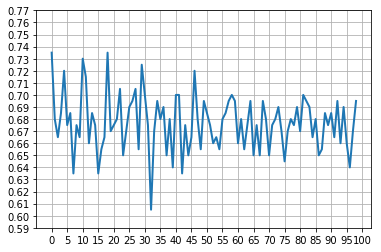

Lowest Testing error value:  [0.605]
Corresponding value of n_estimators:  33
Random Forest with 33  n_estimators gives the least testing error


In [25]:
missClass_randFor = []
for i in range(1,100):
    
    # Make Classifier object called classifierObj
    from sklearn.ensemble  import RandomForestClassifier
    classifierObj_randFor_it = RandomForestClassifier(n_estimators=i, criterion='entropy')
    classifierObj_randFor_it.fit(X_train, y_train)

    #Making Predictions on the Test Set
    y_pred = classifierObj_randFor_it.predict(X_test)

    #Evaluate predictions using a Confusion Matrix
    cm_randFor_it = confusion_matrix(y_test, y_pred)
#     print(i, 'trees num \n',cm_randFor_it)

    #model accuracy
    randFor_accuracy = (cm_randFor_it.diagonal().sum()/cm_randFor_it.sum())
#     print("Model Accuracy:" , randFor_accuracy)

    #misclassification rate
    randFor_missClassif = 1- randFor_accuracy
#     print("Misclassification Error",randFor_missClassif)
    
    missClass_randFor.append([randFor_missClassif])

plt.plot(missClass_randFor, linewidth=2)
plt.grid()
plt.xticks(np.arange(0, 101, step=5))
plt.yticks(np.arange(0.59, 0.775, step=0.01))
plt.show()

randFor_minTEvalue = min(missClass_randFor)
randFor_val = missClass_randFor.index(min(missClass_randFor)) + 1
print('Lowest Testing error value: ', randFor_minTEvalue)
print('Corresponding value of n_estimators: ', randFor_val)
print("Random Forest with", randFor_val ," n_estimators gives the least testing error")
classifierObj_randFor_m5 = RandomForestClassifier(n_estimators=randFor_val, criterion='entropy')



## Q11) Predicting with Ensemble: Now that you have built 5 models. Loop over the testing set. For every test instance, have each of the models predict the class label. Eventual class predicted will be based on a majority vote of the 5 models. What is the testing misclassification rate you get with the ensemble model?

In [26]:
#create empty array to store the five model predictions for each instance
ensemble_pred = np.zeros(shape=(200,5))
for i in range(0,len(X_test)):
    
    # Model 1
    classifierObj_lr.fit(X_train, y_train)
    #Making Predictions on the Test Set
    y_pred_m1 = classifierObj_lr.predict(X_test[[i]])
    ensemble_pred[i,0] = (y_pred_m1)

    # Model 2
    classifierObj_kNN_ensemble.fit(X_train, y_train)
    #Making Predictions on the Test Set
    y_pred_m2 = classifierObj_kNN_ensemble.predict(X_test[[i]])
    ensemble_pred[i,1] = (y_pred_m2)


    # Model 3
    classifierObj_svm_degree_1    
    classifierObj_svm_degree_1.fit(X_train, y_train)
    #Making Predictions on the Test Set
    y_pred_m3 = classifierObj_svm_degree_1.predict(X_test[[i]])
    ensemble_pred[i,2] = (y_pred_m3)


    # Model 4 
    classifierObj_naiBay.fit(X_train, y_train)
    #Making Predictions on the Test Set
    y_pred_m4 = classifierObj_naiBay.predict(X_test[[i]])
    ensemble_pred[i,3] = (y_pred_m4)


    # Model 5
    # Random Forest
    classifierObj_randFor_m5.fit(X_train, y_train)
    #Making Predictions on the Test Set
    y_pred_m5 = classifierObj_randFor_m5.predict(X_test[[i]])
    ensemble_pred[i,4] = (y_pred_m5)

# convert data types to int
ensemble_pred = ensemble_pred.astype('int64')
#create empty list to store the voted class from the ensemble model
voted_pred = []
# vote on majority predicted by ensemble
for i in range(0,len(ensemble_pred)):
    value_vote = np.bincount(ensemble_pred[i,:]).argmax()
    voted_pred.append(value_vote)
    
# print("Ensemble prediction votes: \n",voted_pred)

cm_ensemble = confusion_matrix(y_test, voted_pred)
print("Ensemble Confussion Matrix: \n",cm_ensemble)

#model accuracy
ensemble_accuracy = (cm_ensemble.diagonal().sum()/cm_ensemble.sum())
print("Model Accuracy: ",ensemble_accuracy)

#misclassification rate
ensemble_missClassif = 1- ensemble_accuracy
print("Misclassification Rate: ",ensemble_missClassif)

Ensemble Confussion Matrix: 
 [[35  6 16  4]
 [12  9 12 11]
 [15  5 26  4]
 [17 12  6 10]]
Model Accuracy:  0.4
Misclassification Rate:  0.6
